In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import training data
df = pd.read_csv('training.txt',sep="   ",  header = None)
X = df.drop(2, axis=1)
y = df.drop([0,1], axis=1)

#import validation data
df_validation = pd.read_csv('test.txt',sep="  ",  header = None)
X_validation = df_validation.drop(2, axis=1).astype(float)
y_validation = df_validation.drop([0,1], axis=1)


In [12]:

def logistic(X):    #define Logistic function for convenience
    return 1/ (1+np.exp(-X))


class NN:  #make class: not necessary, just for convenience
    def __init__(self,hidden_layer = 8) :
        self.hidden_layer = hidden_layer
        self.weights_first = np.random.rand(hidden_layer,2)  #init for class. I defined random weights for two layers here, with rand function
        self.weights_second = np.random.rand(hidden_layer)   #init for class. I defined random weights for two layers here, with rand function
        self.loss = []  #Defined empty loss list too, to make graph later
        self.loss_validation = []
        self.eps = 1e-8
        self.grad_first = np.zeros_like(self.weights_first)
        self.grad_second = np.zeros_like(self.weights_second)
        pass
 
  #defining fit, including forward & backward propagation
    def fit(self, X_train,y_train,X_validation, y_validation , epoch= 100, learning_rate = 0.01, optimizers = 'sgd'):
        num = len(X_train)
        num_validation = len(X_validation)

        for _ in range(epoch):   #make iteration as much as epoch
            
            # I didn't do random shuffling at assignment2, and implemented it at assignment 3 now.
            idx = np.random.choice(num, size=num, replace=False)
            idx_validation = np.random.choice(num_validation, size=num_validation, replace=False)
            X_train = X_train.iloc[idx]
            y_train = y_train.iloc[idx]
            X_validation = X_validation.iloc[idx_validation]
            y_validation = y_validation.iloc[idx_validation]
                    
            #empty list to put loss per epoch i
            ER=[]   
            ER_validation =[]

      
            for k in range(num):  #because it is stochastic gradient descent, I implemented forward/backward propagation for every sample
                
                h=[]   #empty list to hidden output in
                
                for i in range(self.hidden_layer):
                    h.append(logistic(np.dot(X_train.iloc[k], self.weights_first[i])))  #calculate h's by multiplication of X and old weights
                                                                                        #and implement logistic
                y = logistic(np.dot(self.weights_second,h))   #calculate result y by logistic & multiplication
                ER.append((1/2)*(y-y_train.iloc[k])**2)  #calculate error. Because output layer is 1, it is calculated just by one sample

            #back propagation start
                EI = ((y-y_train.iloc[k])*y*(1-y)).values   # EI from ouput layer
                
                # I made two options: sgd and adagrad. sgd is same with assignment 2, adagrad is added
                if optimizers == 'sgd':
                    self.weights_second = self.weights_second -learning_rate * EI * h   #becuase formulas are calculated in lecture,
                                                                            #I used the formula to calculate backpropagation
                    self.weights_first = self.weights_first-np.array(                                 
                    [learning_rate*EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][0],    #calculate using formula in class
                     learning_rate*EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][1]]).T
                    
                # in adagrad, learning rate is adjusted
                elif optimizers == 'adagrad':
                    self.grad_second = self.grad_second + np.square(EI * h)  # because squared grad is divided in adagrad, i made grad list
                    self.weights_second = self.weights_second -learning_rate * EI * h /np.sqrt(self.grad_second + self.eps) #becuase formulas are calculated in lecture,
                                                                            #I used the formula to calculate backpropagation
                                                                            #divided by squared grad + eps
                        
                    #grad for first layer is updated
                    self.grad_first = self.grad_first + np.array([np.square(EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][0]),    
                     np.square(EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][1])]).T
                    self.weights_first = self.weights_first-(np.array(                                 
                    [learning_rate*EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][0],    #calculate using formula in class
                     learning_rate*EI*self.weights_second*h*(np.ones(self.hidden_layer)-h)*X_train.iloc[k][1]]).T)/np.sqrt(self.grad_first+self.eps)
                                                                            ##divided by squared grad + eps
                    
                else:
                    print('wrong optimizers')  #to let know that worng oprimizer is input.
                    
                    
                    
            # for question 1, I made validation phase 
            for k in range(num_validation):
                h_validation = []
                
                #h is predicted for validation 
                for i in range(self.hidden_layer):
                    h_validation.append(logistic(np.dot(X_validation.iloc[k], self.weights_first[i])))
                    
                #y is predicted for validation
                y_pred = logistic(np.dot(self.weights_second,h_validation))
                
                #error for validation is appended
                ER_validation.append((1/2)*(y_pred-y_validation.iloc[k])**2)
                
            # put loss from every epoch. I used total mean
            self.loss.append(np.sum(ER)/num)   
            self.loss_validation.append(np.sum(ER_validation)/num_validation)
        pass

    # graph the train loss
    def graph(self):
        plt.figure(figsize=(10,7))
        plt.plot(range(len(self.loss)), self.loss)  # simple graphing of loss by epochs
        plt.ylim([0,0.2])
        plt.title('loss graph by epoch')
        plt.show()
        
    # graph the train and validation loss
    def graph_with_validation(self):
        plt.figure(figsize=(10,7))
        plt.plot(range(len(self.loss)), self.loss, color = 'r', label = 'train')  # simple graphing of loss by epochs
        plt.plot(range(len(self.loss_validation)), self.loss_validation, color = 'b', label = 'validation')  # simple graphing of loss by epochs
        plt.ylim([0,0.2])
        plt.title('loss graph by epoch')
        plt.legend()
        plt.show()

# (a) 
Plot the training loss (with respect to the mean squared error per epoch) versus the 
number of epochs using the training dataset. At the same time, plot the validation loss 

(with respect to the mean squared error per epoch) versus the number of epochs using another file “test.txt” for the 
validation dataset. 

That is, validate your trained model for every epoch. Make discussions based on 
your experimental results by comparing the training loss with the validation loss.


ANSWER: They move similar. It means that fit is done properly, which means it is predicting well. Also, validation loss is lower than train loss almost for all epochs, which means that it does not overfit yet, which is good.

In [ ]:
nn = NN(hidden_layer=8)
nn.fit(X,y,X_validation,y_validation ,epoch = 1000)

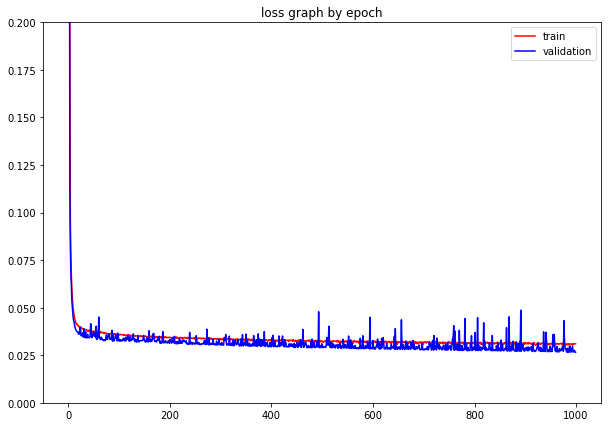

In [31]:
nn.graph_with_validation()

# (b)
Plot the training loss (with respect to the mean squared error per epoch) according to 
different hidden layer sizes,

ranging from 2 to 16, after training your model sufficiently for each 
case. Make discussions based on your experimental results.


ANSWER: using more layers(more parameters), it tends to fit better(lower loss). There is possibility of overfitting though, it cannot be checked with only training loss. 

(I should have checked validation loss for more accurate explanation, but didn't have enough time... it took long to run my function)



In [ ]:
loss = []
for i in range(2,17):
    nn2 = NN(hidden_layer = i)
    nn2.fit(X,y,X_validation,y_validation ,epoch = 500)
    loss.append(nn2.loss[-1])

Text(0, 0.5, 'final loss')

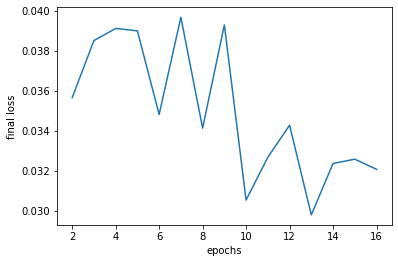

In [20]:
plt.plot(range(2,17), loss)
plt.xlabel('epochs')
plt.ylabel('final loss')

# (c) 
Instead of the SGD, use the adaptive gradient (Adagrad) optimizer, where the 
(initial) learning rate is set to 0.01.

Plot the training loss (with respect to the mean squared error per epoch) versus the number of epochs. Make discussions based on your experimental results.

ANSWER: by the paper, convergence speed is sgd>adagrad. I could check it from graph. 

Red line converge little bit faster than blue line, which means that sgd converged little bit faster. Not a lot though.

 After around 50 epochs, adagrad loss is lower than sgd (little bit). It would be since adagrad adjust learning rate for every parameters, it show better convergence after some point. 
 
 However, as epoches increase and increase, the difference is smaller. 

In [ ]:
nn3 = NN(hidden_layer=8)
nn3.fit(X,y,X_validation,y_validation ,epoch = 1000, optimizers = 'adagrad')

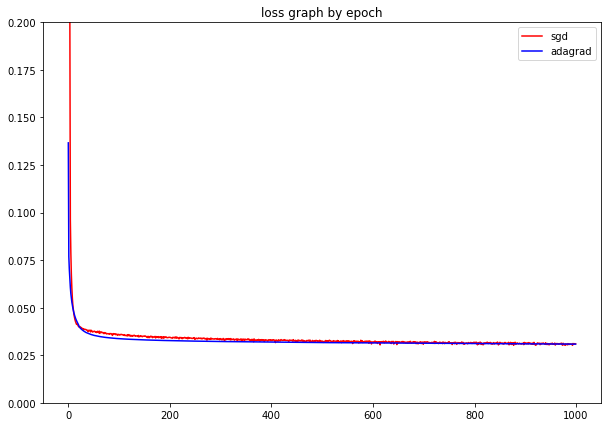

In [30]:
plt.figure(figsize=(10,7))
plt.plot(range(len(nn.loss)), nn.loss, color = 'r', label = 'sgd')#simple graphing of loss by epochs sgd
plt.plot(range(len(nn3.loss)), nn3.loss, color = 'b', label = 'adagrad')# simple graphing of loss by epochs adagrad
plt.ylim([0,0.2])
plt.title('loss graph by epoch')
plt.legend()
plt.show()